# First import necesssary basic python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Dataset

## find some basic dataset online then download it and now that dataset load for furthur execution

In [2]:
df =  pd.read_csv("Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


## Now Inspect the dataset by checking: Shape, missing values, duplicates, and data types.

In [5]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [6]:
df.shape

(2000, 8)

In [7]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

# 2. Data Processing

## 2.1 Standardize the data: use a scaler (e.g., StandardScaler or MinMaxScaler from sklearn) to ensure all features are on the same scale.

### Load basic libraries which is required for the data processing

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [11]:
numerical_cols = ["Age", "Annual Income ($)", "Spending Score (1-100)"]

### For Standard Scaler

In [12]:
scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
df_standard_scaled.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,-1.054089,-2.093501,-0.428339,Healthcare,1,4
1,2,Male,-0.983723,-1.656133,1.075546,Engineer,3,3
2,3,Female,-1.018906,-0.540845,-1.609962,Engineer,1,1
3,4,Female,-0.913356,-1.131292,0.932319,Lawyer,0,2
4,5,Female,-0.631891,-1.590528,-0.392532,Entertainment,2,6


### For Minmax Scaler

In [14]:
scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [15]:
df_minmax_scaled.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,0.191919,0.078958,0.39,Healthcare,1,4
1,2,Male,0.212121,0.184236,0.81,Engineer,3,3
2,3,Female,0.202020,0.452694,0.06,Engineer,1,1
3,4,Female,0.232323,0.310569,0.77,Lawyer,0,2
4,5,Female,0.313131,0.200027,0.40,Entertainment,2,6


# 3. Clustering

## 3.1 Determine the optimal number of clusters: Plot the Within-Cluster Sum of Squares (WCSS) against the number of clusters.

In [16]:
X = df_minmax_scaled[numerical_cols]

In [17]:
wcss = []
k_values = range(1, 11)

In [18]:
# if you got some error likememory leakage in Kmeans then you can follow following steps
# 1. if you are coding in jupyter notebook then open anaconda prompt otherwise you code in vs cpde then open command prompt.
# 2. After open that any one propt then you can Set Environment Variable and the code is "set OMP_NUM_THREADS=1" where 1 is your error no. if you have error of no. 8 then you can change 1 with 8 then run the code.

In [19]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

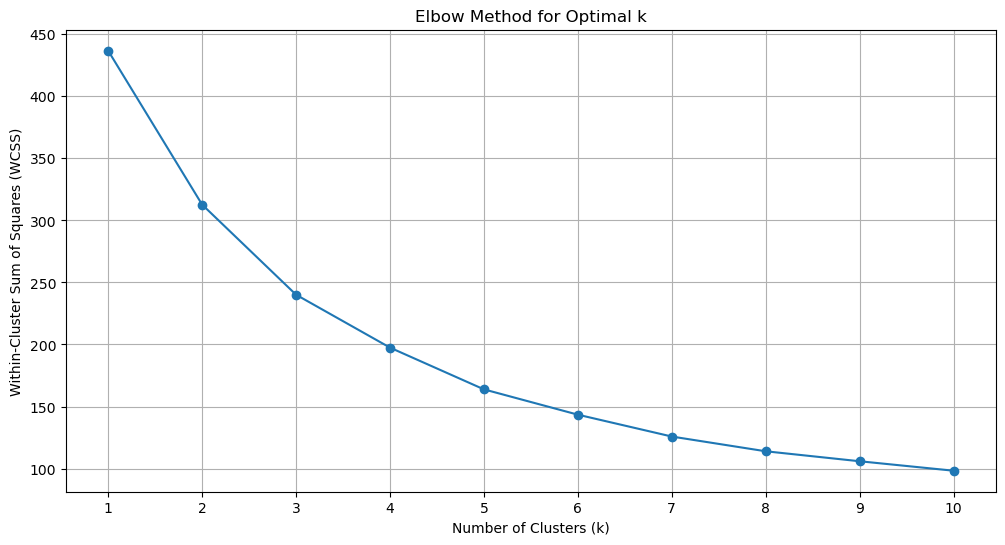

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

## 3.2 The "elbow point" indicates the optimal number of clustersand Assign a cluster label to each customer.

In [21]:
optimal_k = 5

In [22]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_minmax_scaled["Cluster"] = kmeans.fit_predict(df_minmax_scaled[numerical_cols])

In [23]:
df_minmax_scaled.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,Male,0.191919,0.078958,0.39,Healthcare,1,4,4
1,2,Male,0.212121,0.184236,0.81,Engineer,3,3,3
2,3,Female,0.202020,0.452694,0.06,Engineer,1,1,4
3,4,Female,0.232323,0.310569,0.77,Lawyer,0,2,3
4,5,Female,0.313131,0.200027,0.40,Entertainment,2,6,4
5,6,Female,0.222222,0.305305,0.76,Artist,0,2,3
6,7,Female,0.353535,0.163180,0.06,Healthcare,1,3,4
7,8,Female,0.232323,0.442166,0.94,Healthcare,1,3,3
8,9,Male,0.646465,0.510596,0.03,Engineer,0,3,0
9,10,Female,0.303030,0.515860,0.72,Artist,1,4,3


## 3.3 Alternatively, use the Silhouette Score for evaluation.

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_scores = {}

In [26]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_minmax_scaled[numerical_cols])
    score = silhouette_score(df_minmax_scaled[numerical_cols], labels)
    silhouette_scores[k] = score

In [27]:
silhouette_scores

{2: 0.26782007023499566,
 3: 0.26946273796140363,
 4: 0.26699074634281256,
 5: 0.2786496837887384,
 6: 0.2816017000714546,
 7: 0.2797879640449612,
 8: 0.27032103607213576,
 9: 0.2717719522327584,
 10: 0.27086249715180133}

In [28]:
for k, score in silhouette_scores.items():
    print(f"k = {k}: {score:.4f}")

k = 2: 0.2678
k = 3: 0.2695
k = 4: 0.2670
k = 5: 0.2786
k = 6: 0.2816
k = 7: 0.2798
k = 8: 0.2703
k = 9: 0.2718
k = 10: 0.2709


# 4. Visualization

## 4.1  Use PCA (Principal Component Analysis) or t-SNE to reduce dimensions to two for visualization and plot clusters in different colours.

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)

In [31]:
pca_components = pca.fit_transform(df_minmax_scaled[numerical_cols])

In [32]:
df_minmax_scaled["PCA1"] = pca_components[:, 0]

In [33]:
df_minmax_scaled["PCA2"] = pca_components[:, 1]

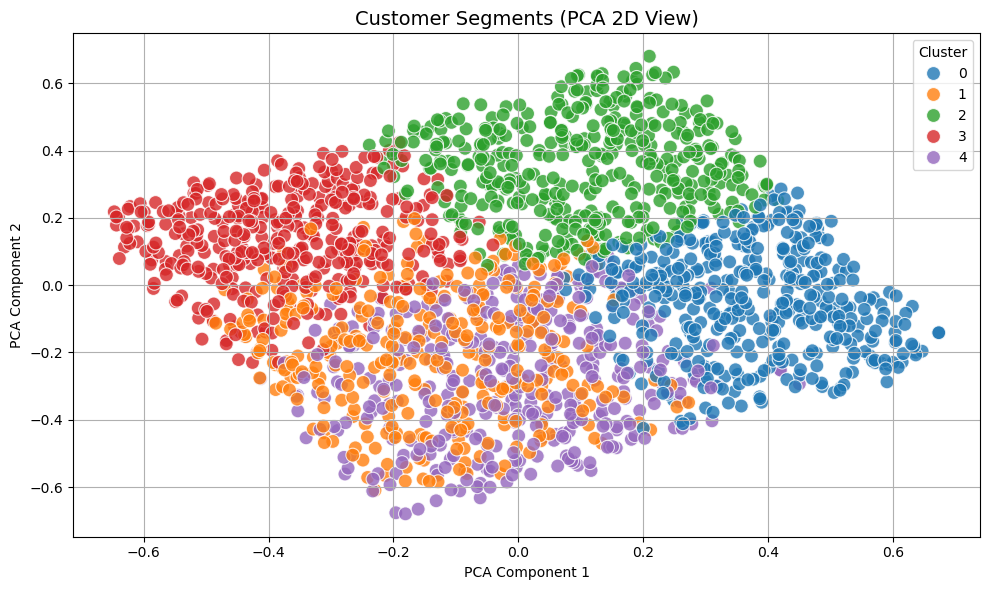

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="Cluster",
    palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"],
    data=df_minmax_scaled,
    s=100,
    alpha=0.8,
    legend='full'  
)
plt.title("Customer Segments (PCA 2D View)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.2 Pair Plots: Visualize relationships between features within clusters.

In [35]:
df_pairplot = df.copy()
df_pairplot["Cluster"] = df_minmax_scaled["Cluster"].astype(str)

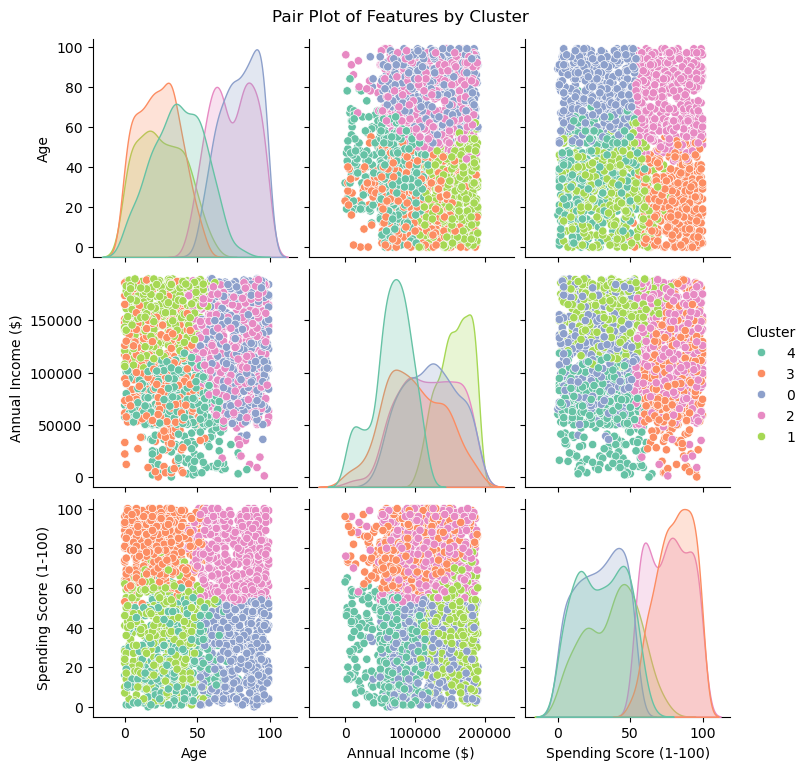

In [36]:
sns.pairplot(df_pairplot, 
             vars=numerical_cols,
             hue="Cluster",
             palette="Set2",
             height=2.5)
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()

## 4.3 Centroid Visuals: Show the centroid of each cluster for better interpretation.

In [37]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=numerical_cols)
centroids_pca = pca.transform(centroids_df)

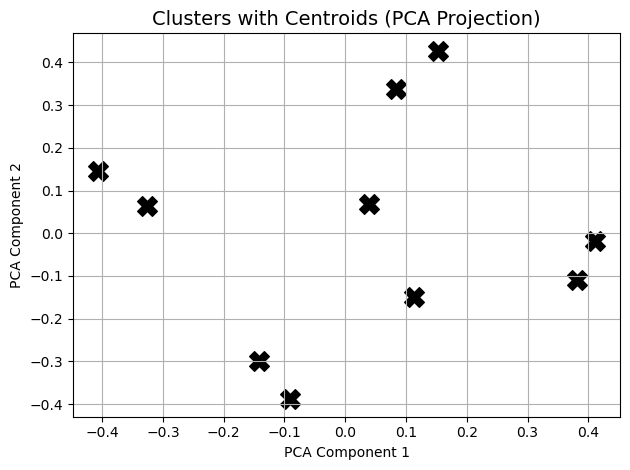

In [38]:
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=200,
    c='black',
    label='Centroids'
)
plt.title("Clusters with Centroids (PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()